In [1]:
import pandas as pd 
import numpy as np
from pandas_profiling import ProfileReport
import  matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix , roc_auc_score , roc_curve
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,MiniBatchKMeans,DBSCAN

/var/folders/fx/3nwbtnkj6d15hsllgtl4k1kh0000gn/T/ipykernel_63023/1906206552.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
import ydata_profiling

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv',sep=';')

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [6]:
from pandas_profiling import ProfileReport

In [7]:
pf = ProfileReport(df)

In [8]:
pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [64]:
# pf

In [10]:
x = df.drop(columns='quality')
y = df.quality

In [11]:
#Standardization
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled,columns=x.columns)

In [12]:
df_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [13]:
#PCA
pca = PCA()
pca.fit_transform(df_scaled)
pd.DataFrame(pca.fit_transform(df_scaled), columns = x.columns)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258,0.005098,-0.267759,0.048630
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392,0.929714,-1.009829,0.762587,-0.520707,0.062833,-0.138142
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531,0.401473,-0.539553,0.597946,-0.086857,-0.187442,-0.118229
3,2.357673,-0.269976,0.243489,-0.928450,-1.499149,-0.131017,0.344290,-0.455375,0.091577,-0.130393,0.316714
4,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258,0.005098,-0.267759,0.048630
...,...,...,...,...,...,...,...,...,...,...,...
1594,-2.150500,0.814286,0.617063,0.407687,-0.240936,0.054835,0.170812,-0.355866,-0.971524,0.356851,-0.053382
1595,-2.214496,0.893101,1.807402,0.414003,0.119592,-0.674711,-0.607970,-0.247640,-1.058135,0.478879,-0.241258
1596,-1.456129,0.311746,1.124239,0.491877,0.193716,-0.506410,-0.231082,0.079382,-0.808773,0.242248,-0.402910
1597,-2.270518,0.979791,0.627965,0.639770,0.067735,-0.860408,-0.321487,-0.468876,-0.612248,0.779404,0.040923


In [14]:
pca.explained_variance_ratio_

array([0.28173931, 0.1750827 , 0.1409585 , 0.11029387, 0.08720837,
       0.05996439, 0.05307193, 0.03845061, 0.0313311 , 0.01648483,
       0.00541439])

In [15]:
np.cumsum(pca.explained_variance_ratio_)

array([0.28173931, 0.45682201, 0.59778051, 0.70807438, 0.79528275,
       0.85524714, 0.90831906, 0.94676967, 0.97810077, 0.99458561,
       1.        ])

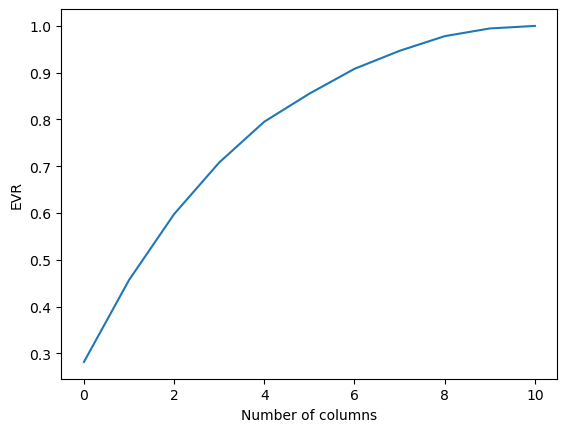

In [16]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of columns')
plt.ylabel('EVR')
plt.show()          #we can use 6columns to conclude 90%data

In [17]:
#Clustering

In [18]:
x_cluster = df.iloc[:,10:]
x_cluster

,alcohol,quality
0,9.4,5
1,9.8,5
2,9.8,5
3,9.8,6
4,9.4,5
...,...,...
1594,10.5,5
1595,11.2,6
1596,11.0,6
1597,10.2,5


In [19]:
#KMeans

In [20]:
wcss = []

for i in range(1,15):
    kmean = KMeans(n_clusters = i, init = 'k-means++', random_state = 30)
    kmean.fit(x_cluster)
    wcss.append(kmean.inertia_)


/Users/mdhammadakram/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mdhammadakram/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mdhammadakram/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mdhammadakram/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

In [21]:
wcss

[2856.9296404002516,
 1303.3576024857746,
 941.7087572837129,
 721.3643905305211,
 542.6642885414337,
 451.15358088224025,
 381.74423738756445,
 329.1849012030439,
 289.8108936936817,
 243.48013969109036,
 214.91358522099108,
 188.75773614453348,
 170.05519611118174,
 154.25235609706843]

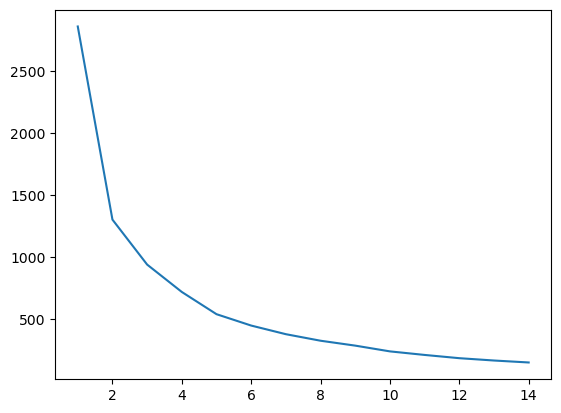

In [22]:
plt.plot(range(1,15),wcss)  #Elbow Diagram

In [23]:
kmean1 = KMeans(n_clusters = 5 ,init='k-means++',random_state=30)
kmean1.fit_predict(x_cluster)

/Users/mdhammadakram/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 4, 4, ..., 3, 1, 3], dtype=int32)

In [24]:
#adding a cluster column in x_cluster
x_cluster['cluster_number'] = kmean1.fit_predict(x_cluster)
x_cluster

/Users/mdhammadakram/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,alcohol,quality,cluster_number
0,9.4,5,4
1,9.8,5,4
2,9.8,5,4
3,9.8,6,2
4,9.4,5,4
...,...,...,...
1594,10.5,5,1
1595,11.2,6,3
1596,11.0,6,3
1597,10.2,5,1


In [25]:
x_cluster[x_cluster['cluster_number']==4]

,alcohol,quality,cluster_number
0,9.4,5,4
1,9.8,5,4
2,9.8,5,4
4,9.4,5,4
5,9.4,5,4
...,...,...,...
1567,10.1,5,4
1568,9.2,5,4
1572,9.5,5,4
1583,9.8,5,4


In [26]:
x_cluster[x_cluster['cluster_number']==0]

,alcohol,quality,cluster_number
95,12.9,6,0
131,13.0,5,0
132,13.0,5,0
142,14.0,6,0
144,14.0,6,0
...,...,...,...
1575,11.8,6,0
1577,11.9,6,0
1580,11.9,6,0
1584,11.6,7,0


In [27]:
#minibatch
minibatch_kmean = MiniBatchKMeans(n_clusters = 5)
minibatch_kmean.fit(x_cluster)
minibatch_kmean.predict([[55,31,4]])

/Users/mdhammadakram/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mdhammadakram/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

In [28]:
#DBSCAN
dbscan = DBSCAN(eps = 1,min_samples = 3)
dbscan.fit(x_cluster)
dbscan.labels_
set(dbscan.labels_)

{-1, 0, 1, 2, 3, 4}

In [147]:
#Dediving the dataset into 75%training and 25%testing 
x_train , x_test, y_train,y_test = train_test_split(x,y,test_size = .25,random_state = 30)

In [148]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
dt_model.score(x_test,y_test)

0.6325

[Text(0.5700282889170897, 0.9722222222222222, 'x[10] <= 10.525\ngini = 0.642\nsamples = 1279\nvalue = [9, 43, 551, 506, 157, 13]'),
 Text(0.37250158629441626, 0.9166666666666666, 'x[6] <= 98.5\ngini = 0.541\nsamples = 786\nvalue = [6, 27, 465, 256, 30, 2]'),
 Text(0.23146679357021996, 0.8611111111111112, 'x[9] <= 0.575\ngini = 0.568\nsamples = 689\nvalue = [6, 26, 375, 251, 29, 2]'),
 Text(0.08037225042301184, 0.8055555555555556, 'x[10] <= 9.75\ngini = 0.496\nsamples = 263\nvalue = [4, 20, 176, 59, 4, 0]'),
 Text(0.03849407783417936, 0.75, 'x[8] <= 3.54\ngini = 0.389\nsamples = 165\nvalue = [2, 11, 126, 25, 1, 0]'),
 Text(0.03510998307952622, 0.6944444444444444, 'x[10] <= 9.075\ngini = 0.372\nsamples = 162\nvalue = [2, 11, 126, 22, 1, 0]'),
 Text(0.01353637901861252, 0.6388888888888888, 'x[0] <= 7.8\ngini = 0.711\nsamples = 11\nvalue = [1, 3, 3, 4, 0, 0]'),
 Text(0.00676818950930626, 0.5833333333333334, 'x[9] <= 0.515\ngini = 0.48\nsamples = 5\nvalue = [0, 3, 2, 0, 0, 0]'),
 Text(0.003

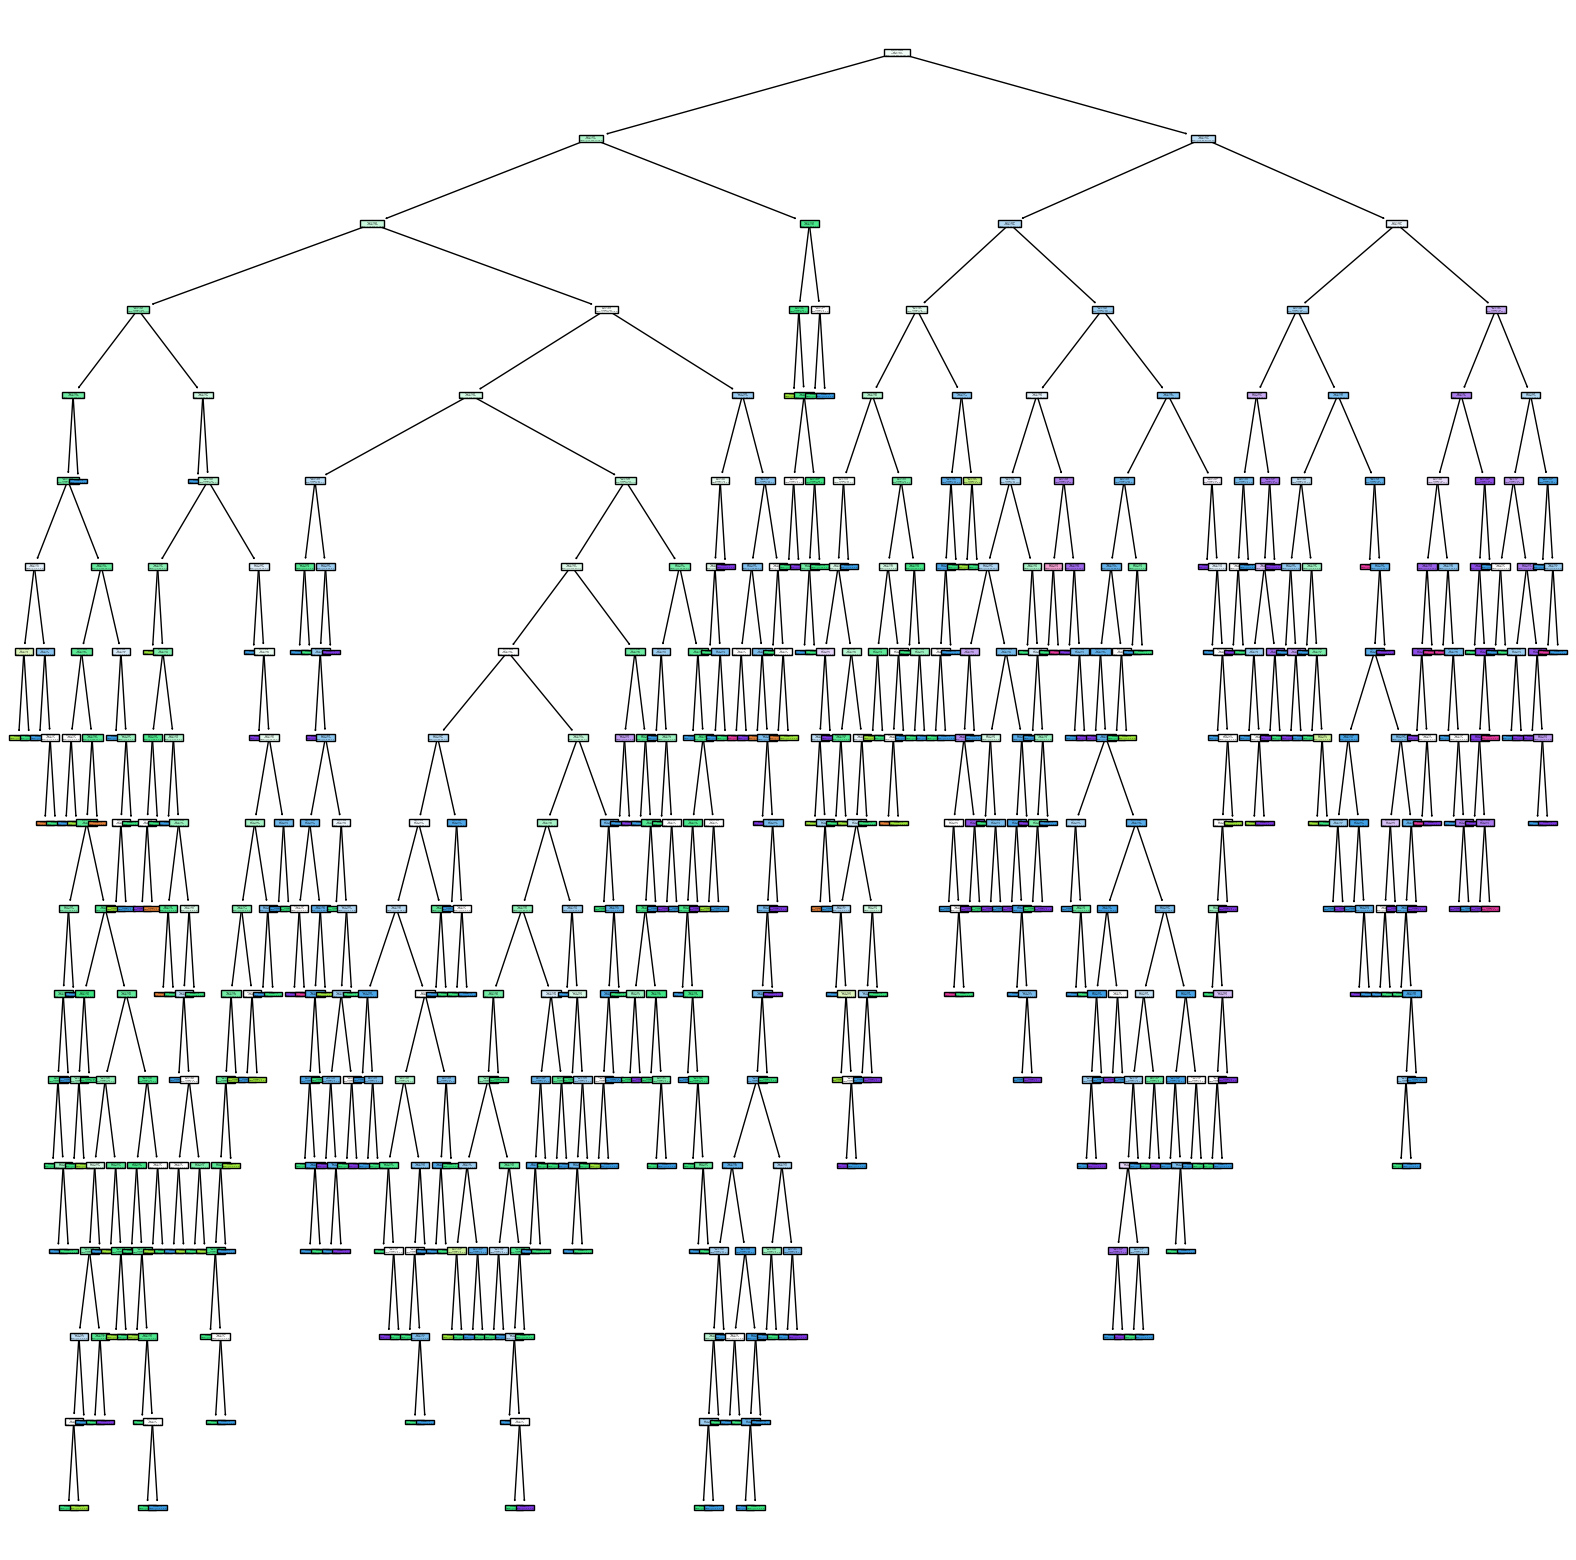

In [90]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model,filled=True)

In [91]:
#Model1
df1 = df.head(30)
x1 = df1.drop(columns='quality')
y1 = df1.quality
dt_model1 = DecisionTreeClassifier()
dt_model1.fit(x1,y1)

DecisionTreeClassifier()

[Text(0.625, 0.9166666666666666, 'citric acid <= 0.42\ngini = 0.471\nsamples = 30\nvalue = [1, 21, 5, 3]\nclass = 5'),
 Text(0.4166666666666667, 0.75, 'total sulfur dioxide <= 22.0\ngini = 0.334\nsamples = 26\nvalue = [1, 21, 2, 2]\nclass = 5'),
 Text(0.25, 0.5833333333333334, 'free sulfur dioxide <= 8.5\ngini = 0.625\nsamples = 4\nvalue = [0, 1, 1, 2]\nclass = 7'),
 Text(0.16666666666666666, 0.4166666666666667, 'density <= 0.996\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0]\nclass = 5'),
 Text(0.08333333333333333, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]\nclass = 5'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0]\nclass = 6'),
 Text(0.3333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2]\nclass = 7'),
 Text(0.5833333333333334, 0.5833333333333334, 'free sulfur dioxide <= 7.5\ngini = 0.169\nsamples = 22\nvalue = [1, 20, 1, 0]\nclass = 5'),
 Text(0.5, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]\nclass =

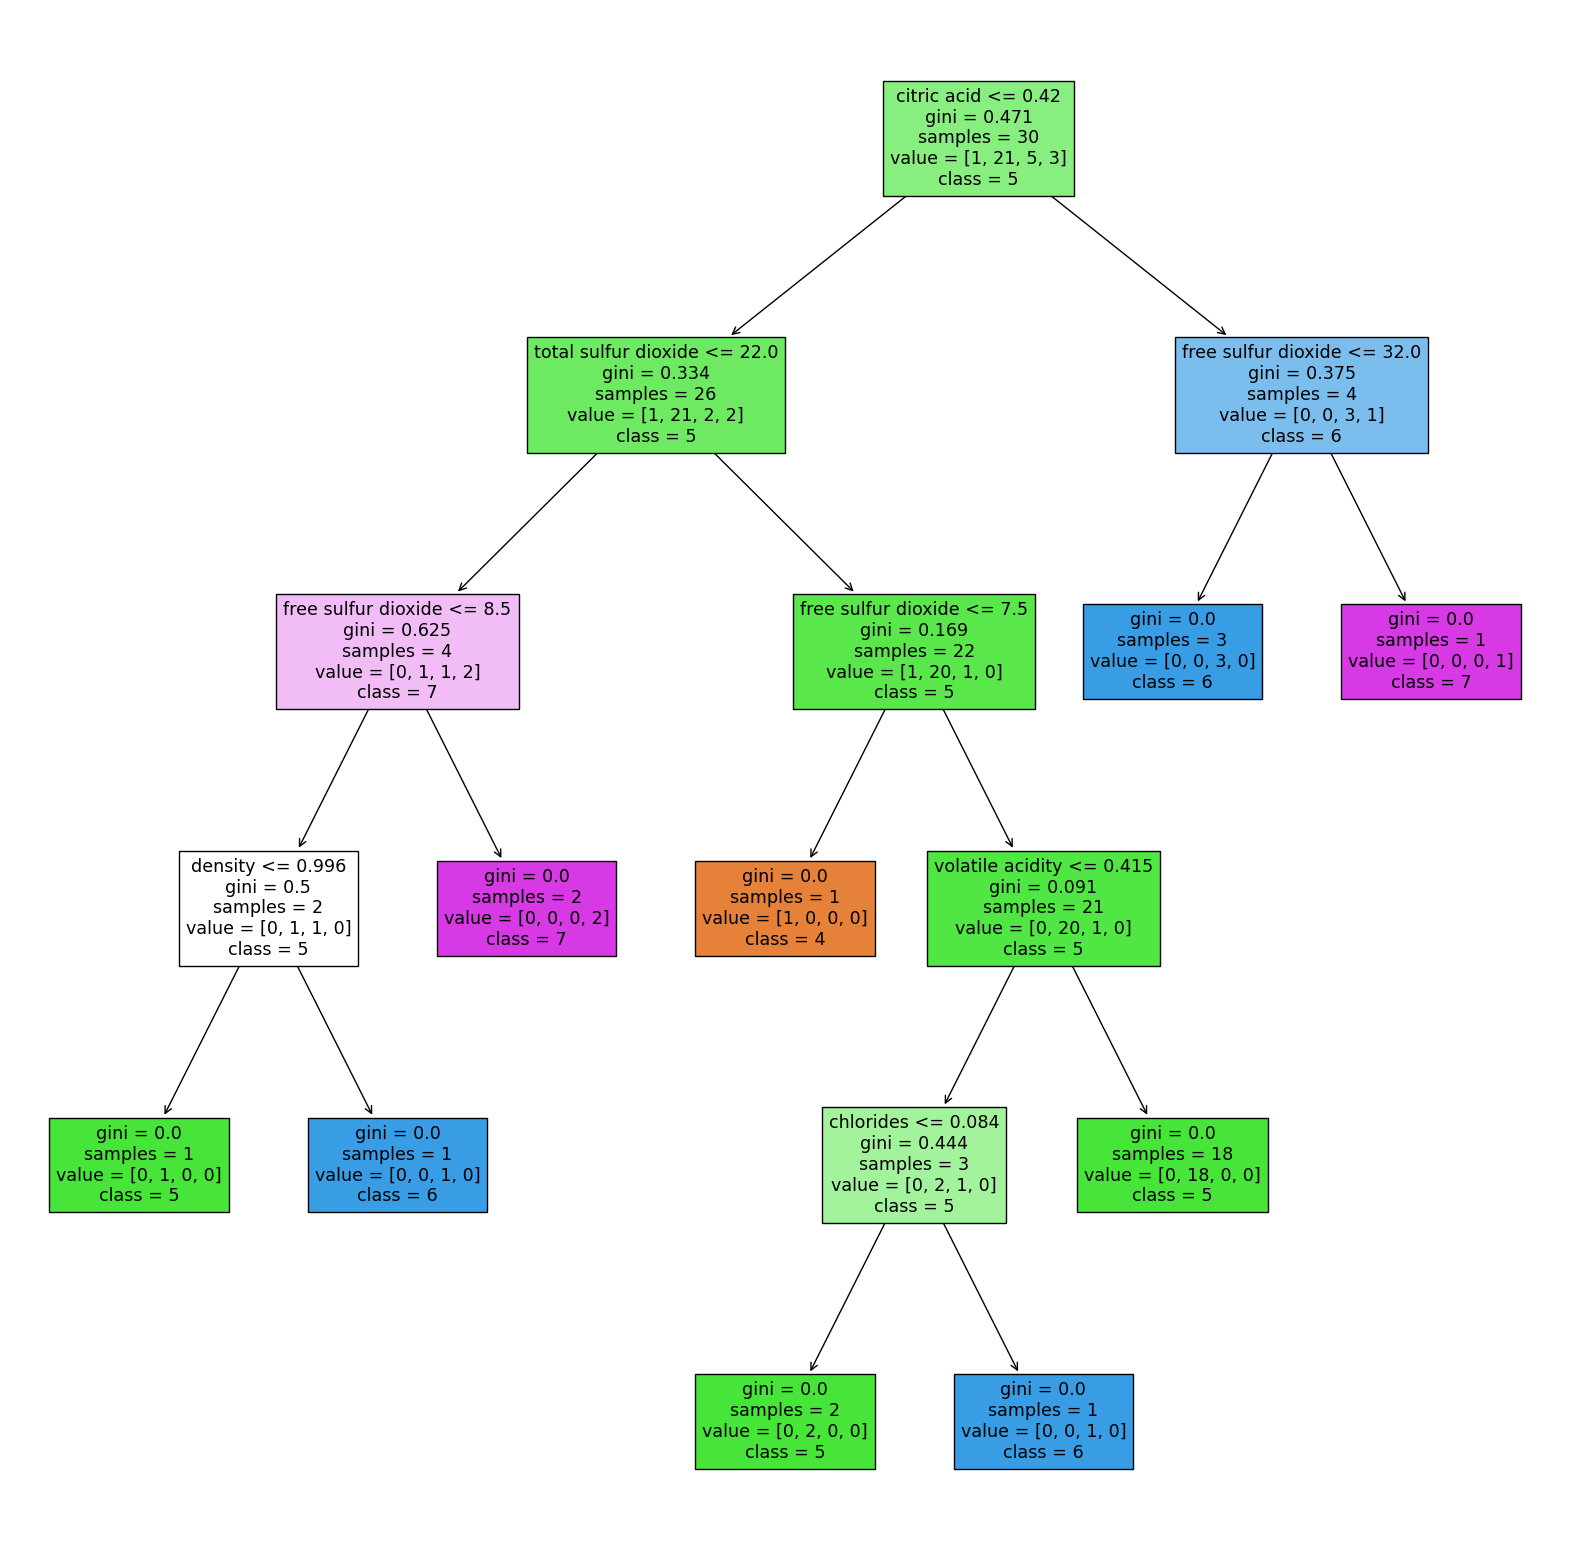

In [119]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model1,filled=True, class_names=[str(i) for i in set(y1)] ,feature_names=x1.columns)
# plt.savefig('dt_model_1')  =>To save the figure

In [120]:
#Model2
df2 = df.head(500)
x2 = df2.drop(columns='quality')
y2 = df2.quality
dt_model2 = DecisionTreeClassifier()
dt_model2.fit(x2,y2)

DecisionTreeClassifier()

[Text(0.4400699976569822, 0.9705882352941176, 'alcohol <= 9.85\ngini = 0.624\nsamples = 500\nvalue = [1, 16, 239, 184, 52, 8]\nclass = 5'),
 Text(0.273078725398313, 0.9117647058823529, 'total sulfur dioxide <= 62.5\ngini = 0.504\nsamples = 259\nvalue = [1, 12, 167, 72, 6, 1]\nclass = 5'),
 Text(0.16940018744142454, 0.8529411764705882, 'citric acid <= 0.415\ngini = 0.576\nsamples = 169\nvalue = [1, 9, 91, 61, 6, 1]\nclass = 5'),
 Text(0.07638238050609185, 0.7941176470588235, 'alcohol <= 9.05\ngini = 0.525\nsamples = 131\nvalue = [0, 8, 81, 39, 3, 0]\nclass = 5'),
 Text(0.022492970946579195, 0.7352941176470589, 'sulphates <= 0.54\ngini = 0.403\nsamples = 12\nvalue = [0, 2, 1, 9, 0, 0]\nclass = 6'),
 Text(0.01499531396438613, 0.6764705882352942, 'fixed acidity <= 7.15\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1, 0, 0, 0]\nclass = 4'),
 Text(0.007497656982193065, 0.6176470588235294, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]\nclass = 5'),
 Text(0.022492970946579195, 0.6176470588

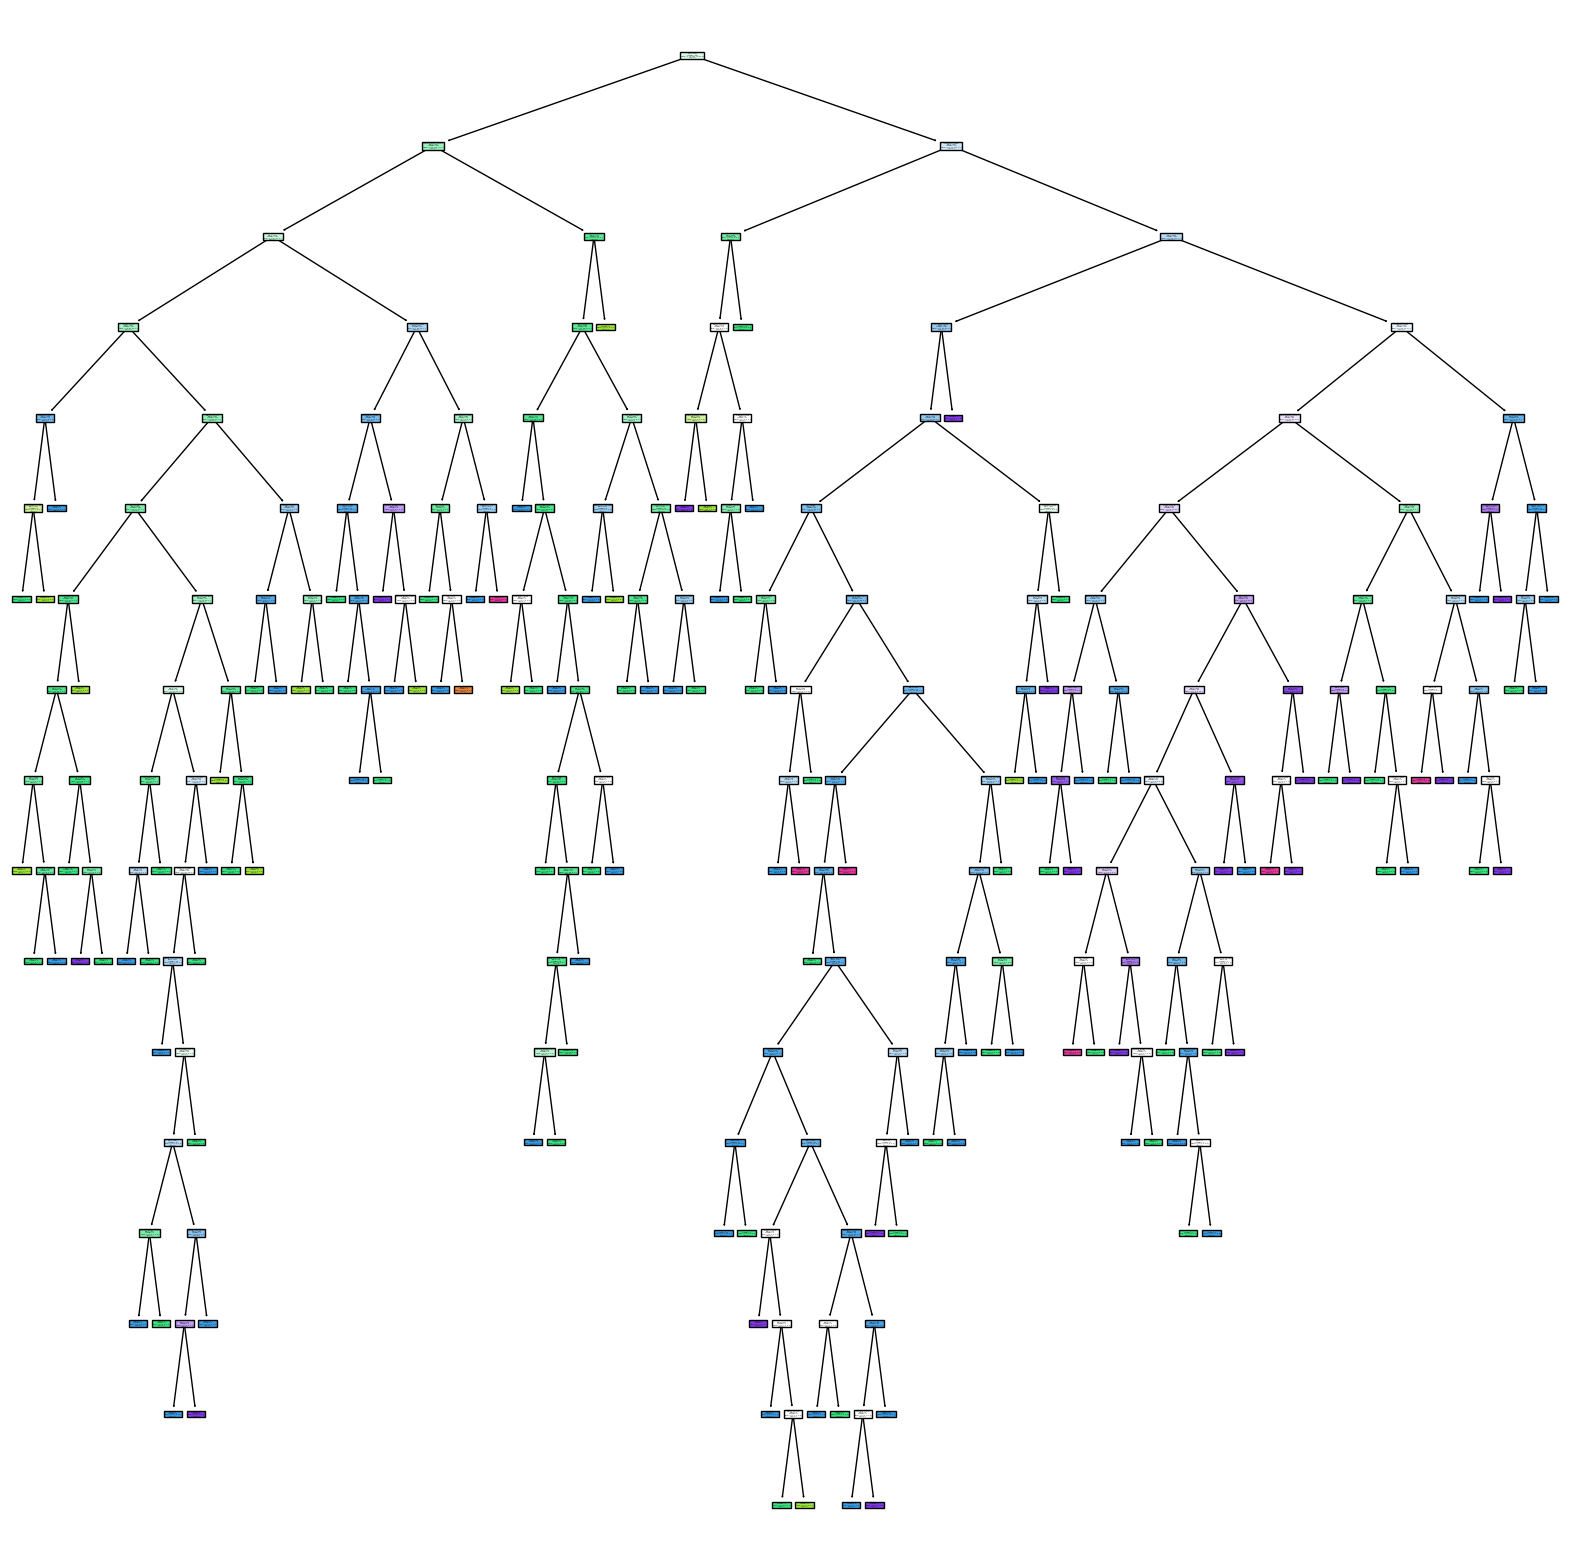

In [121]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model2,filled=True, class_names=[str(i) for i in set(y2)] ,feature_names=x2.columns)
# plt.savefig('dt_model_1')  =>To save the figure

In [36]:
#pruning

In [122]:
path = dt_model1.cost_complexity_pruning_path(x2,y2)
cp_alpha = path.ccp_alphas

NameError: name 'c' is not defined

In [123]:
path

{'ccp_alphas': array([0.        , 0.00166667, 0.00175   , 0.00181818, 0.00184615,
        0.00188235, 0.00192308, 0.002     , 0.002     , 0.002     ,
        0.002     , 0.002     , 0.002     , 0.002     , 0.002     ,
        0.002     , 0.002     , 0.00203333, 0.00247552, 0.00261111,
        0.00262769, 0.00266667, 0.00266667, 0.00266667, 0.00266667,
        0.00266667, 0.00266667, 0.00266667, 0.00266667, 0.00272222,
        0.00285714, 0.003     , 0.003     , 0.003     , 0.003     ,
        0.00304762, 0.00305051, 0.00308418, 0.00325   , 0.00328205,
        0.00333333, 0.00333333, 0.00334032, 0.00336606, 0.00342857,
        0.00343316, 0.0035    , 0.0035    , 0.0036    , 0.00363636,
        0.00373333, 0.00373809, 0.0038    , 0.0038237 , 0.004     ,
        0.00404444, 0.00428571, 0.00428571, 0.00437662, 0.00462338,
        0.00465709, 0.00466667, 0.0048    , 0.00487179, 0.00504242,
        0.00508235, 0.00509091, 0.00510606, 0.00516667, 0.00568485,
        0.00589394, 0.00656364, 0.

In [124]:
ccp_alpha

array([0.        , 0.00175   , 0.00181818, 0.00184615, 0.00185   ,
       0.00186667, 0.00188235, 0.00192308, 0.002     , 0.002     ,
       0.002     , 0.002     , 0.002     , 0.002     , 0.002     ,
       0.002     , 0.002     , 0.002     , 0.002     , 0.00261111,
       0.00262769, 0.00266667, 0.00266667, 0.00266667, 0.00266667,
       0.00266667, 0.00266667, 0.00266667, 0.00266667, 0.00266667,
       0.00271329, 0.00272222, 0.003     , 0.003     , 0.003     ,
       0.003     , 0.00304762, 0.00304762, 0.00305051, 0.00308418,
       0.00325   , 0.00328205, 0.00333333, 0.00333333, 0.00334032,
       0.00336606, 0.00342857, 0.00343316, 0.0035    , 0.0035    ,
       0.0036    , 0.00363636, 0.00373809, 0.0038    , 0.0038237 ,
       0.004     , 0.00404444, 0.00428571, 0.00428571, 0.00437662,
       0.00462338, 0.00465709, 0.00466667, 0.0048    , 0.00487179,
       0.00504242, 0.00508235, 0.00509091, 0.00510606, 0.00516667,
       0.00568485, 0.00589394, 0.00656364, 0.00671079, 0.00675

Text(0, 0.5, 'score')

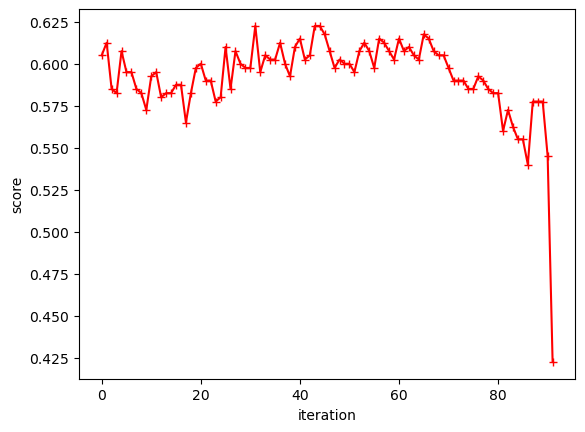

In [125]:
dt_model_ccp_list = []
score = []
for i in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha = i)
    dt_m.fit(x2,y2)
    dt_model_ccp_list.append(dt_m)
    score.append(dt_m.score(x_test, y_test))

    
plt.plot(score, 'r-+')
plt.xlabel('iteration')
plt.ylabel('score')

In [126]:
dt_model_ccp_list  #select the least ccp

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.00175),
 DecisionTreeClassifier(ccp_alpha=0.0018181818181818184),
 DecisionTreeClassifier(ccp_alpha=0.0018461538461538455),
 DecisionTreeClassifier(ccp_alpha=0.0018500000000000005),
 DecisionTreeClassifier(ccp_alpha=0.001866666666666667),
 DecisionTreeClassifier(ccp_alpha=0.001882352941176471),
 DecisionTreeClassifier(ccp_alpha=0.0019230769230769243),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.0026111111111111114),
 DecisionTreeClassifier(ccp_alpha=0.0026276923076923083),
 Deci

In [127]:
train_score = [i.score(x2,y2) for i in dt_model_ccp_list]
print(train_score)

[1.0, 0.996, 0.996, 0.994, 0.99, 0.99, 0.988, 0.988, 0.964, 0.96, 0.96, 0.964, 0.96, 0.96, 0.96, 0.958, 0.962, 0.96, 0.962, 0.952, 0.948, 0.928, 0.93, 0.926, 0.932, 0.928, 0.93, 0.93, 0.932, 0.932, 0.93, 0.926, 0.914, 0.92, 0.918, 0.912, 0.914, 0.914, 0.916, 0.908, 0.906, 0.9, 0.9, 0.902, 0.896, 0.898, 0.886, 0.89, 0.886, 0.886, 0.884, 0.876, 0.868, 0.872, 0.864, 0.854, 0.858, 0.848, 0.856, 0.852, 0.848, 0.824, 0.828, 0.814, 0.824, 0.804, 0.802, 0.794, 0.79, 0.786, 0.784, 0.78, 0.776, 0.776, 0.772, 0.768, 0.762, 0.758, 0.742, 0.728, 0.718, 0.698, 0.69, 0.682, 0.676, 0.676, 0.636, 0.596, 0.596, 0.596, 0.558, 0.478]


In [128]:
test_score = [i.score(x_test ,y_test) for i in dt_model_ccp_list]
print(test_score)

[0.605, 0.6125, 0.585, 0.5825, 0.6075, 0.595, 0.595, 0.585, 0.5825, 0.5725, 0.5925, 0.595, 0.58, 0.5825, 0.5825, 0.5875, 0.5875, 0.565, 0.5825, 0.5975, 0.6, 0.59, 0.59, 0.5775, 0.58, 0.61, 0.585, 0.6075, 0.6, 0.5975, 0.5975, 0.6225, 0.595, 0.605, 0.6025, 0.6025, 0.6125, 0.6, 0.5925, 0.61, 0.615, 0.6025, 0.605, 0.6225, 0.6225, 0.6175, 0.6075, 0.5975, 0.6025, 0.6, 0.6, 0.595, 0.6075, 0.6125, 0.6075, 0.5975, 0.615, 0.6125, 0.6075, 0.6025, 0.615, 0.6075, 0.61, 0.605, 0.6025, 0.6175, 0.615, 0.6075, 0.605, 0.605, 0.5975, 0.59, 0.59, 0.59, 0.585, 0.585, 0.5925, 0.59, 0.585, 0.5825, 0.5825, 0.56, 0.5725, 0.5625, 0.555, 0.555, 0.54, 0.5775, 0.5775, 0.5775, 0.545, 0.4225]


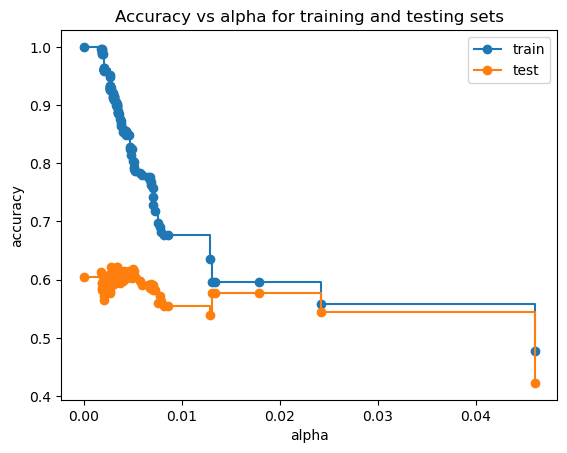

In [129]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alpha, train_score, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alpha, test_score, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [130]:
#select the minimum ccp_alpha

In [131]:
dt_model_ccp = DecisionTreeClassifier(random_state=0 , ccp_alpha=.014)
dt_model_ccp.fit(x2,y2)
dt_model_ccp.score(x_test,y_test)

0.5775

In [82]:
#Grid

In [83]:
grid_pram = {"criterion":['gini','entropy'],
             "splitter":['best','random'],
             "max_depth" : range(2,40,1),
             "min_samples_split":range(2,10 ,1),
             "min_samples_leaf":range(1,10,1),
             'ccp_alpha':np.random.rand(20)
             }

In [55]:
grid_ccp = GridSearchCV(estimator=dt_model_ccp,param_grid=grid_pram , cv = 10 , n_jobs=-1)

In [56]:
grid_ccp.fit(x2,y2)

/Users/mdhammadakram/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


KeyboardInterrupt: 

In [57]:
grid_ccp.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [84]:
dt_perfect_model = DecisionTreeClassifier(criterion='entropy' , max_depth=16 ,min_samples_leaf=2 , min_samples_split=3 , splitter='random',ccp_alpha=0.014)

In [85]:
dt_perfect_model.fit(x2,y2)
dt_perfect_model.score(x_test,y_test)

0.54

In [87]:
confusion_matrix(y_test,dt_perfect_model.predict(x_test))

array([[  0,   0,   1,   1,   0,   0],
       [  0,   0,  14,   3,   1,   0],
       [  0,   0, 135,  21,  13,   0],
       [  0,   0,  52,  55,  54,   0],
       [  0,   0,   9,  11,  26,   0],
       [  0,   0,   0,   0,   4,   0]])